In [17]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
import analysis.acc_graphs as acg

In [22]:
# Funciton to graph slice vs dice accuracy
cpal = sns.color_palette("pastel", 8)
SAVE_PATH = '/bmrNAS/people/arjun/msk_seg_networks/analysis/exp_graphs'
def graph_acc(exp_dict, show_plot=False):
    data_keys = exp_dict['keys']
    filename = exp_dict['filename']

    plt.clf()
    
    legend_keys = []
    c = 0
    for data_key in data_keys:
        data_dirpath = exp_dict[data_key]
        if len(data_dirpath) == 0:
            continue

        mat_filepath = os.path.join(data_dirpath, 'total_interp_data.mat')
        mat_data = sio.loadmat(mat_filepath)
        xs = mat_data['xs']
        ys = mat_data['ys']

        x_interp_mean = np.mean(xs, 0)
        y_interp_mean = np.mean(ys, 0)
        y_interp_sem = np.std(ys, 0) / np.sqrt(ys.shape[0])

        plt.plot(x_interp_mean, y_interp_mean, 'k', color=cpal[c])
        plt.fill_between(x_interp_mean, y_interp_mean - y_interp_sem, y_interp_mean + y_interp_sem, alpha=0.35, edgecolor=cpal[c], facecolor=cpal[c])
        
        legend_keys.append(data_key)
        c += 1

    plt.ylim([0.6, 1])
    plt.xlabel('FOV (%)')
    plt.ylabel('Dice')
    plt.legend(legend_keys)
    plt.savefig(os.path.join(SAVE_PATH, filename))# Architecture experiment
    
    if show_plot:
        plt.show()

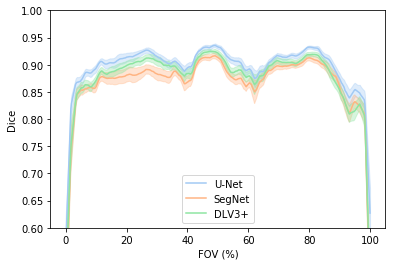

In [19]:
# Base unet - best performing network
BASE_UNET = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/unet_2d/original_akshaysc/test_results'

In [ ]:
# Architecture result paths
ARCH_UNET = BASE_UNET
ARCH_SEGNET = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/segnet_2d/2018-09-01-22-39-39/fine_tune/test_results'
ARCH_DEEPLAB = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/deeplabv3_2d/2018-09-26-19-07-53/fine_tune/test_results/16_2-4-6'
ARCHS = {'filename': 'architecture.png',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
graph_acc(ARCHS, True)

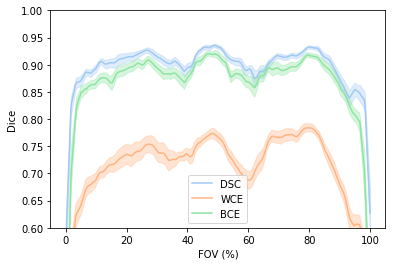

In [21]:
# Loss function result paths
LOSS_DSC = BASE_UNET
LOSS_WCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-00-49-34/test_results'
LOSS_BCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-15-54-44/test_results'

LOSSES = {'filename': 'losses.png',
          'keys': ['DSC', 'WCE', 'BCE'],
          'DSC': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE}
graph_acc(LOSSES, True)

In [ ]:
# Augmentation results


In [ ]:
VOLUME_2D = BASE_UNET
VOLUME_2_5D_3 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-14-17-11-54/test_results' # 2.5D network with 3 slices (+/-1)
VOLUME_2_5D_5 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-21-02-31-40/test_results' # 2.5D network with 5 slices (+/-2)

LOSSES = {'filename': 'volumes.png',
          'keys': ['2D', '2.5D-3', '2.5D-5'],
          '2D': VOLUME_2D, '2.5D-3': VOLUME_2_5D_3, '2.5D-5': VOLUME_2_5D_5}
graph_acc(LOSSES, True)